<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: Predicting a numerical variable based on some other combination of variables... predicting a number



In [ ]:
# Import TensorFlow
import tensorflow as tf

print(tf.__version__)

2.8.0


# Create data to view and fit

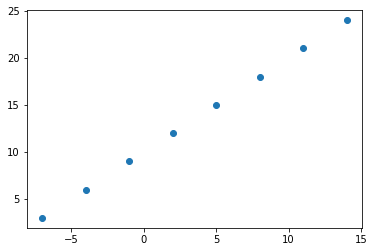

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([[ True,  True,  True,  True,  True,  True,  True,  True]])

# Input and Output shapes

In [ ]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
X[1], y[1]

IndexError: ignored

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

In [ ]:
X[0].ndim

In [ ]:
X[0], y[0]

In [ ]:
# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

In [ ]:
plt.scatter(X, y)

## steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layrs of a deep learning model.

2. **Compiling a model** - define a loss function (The function which tells our model how wrong it is.) and the optimizer (tells our model how to improve the pattersn it's learning. and evaluation metrics (What we can use to interprit the performance of out model.)

3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels)


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 506ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 10.9748 - mae: 10.9748


(TensorShape([8, 1]), (8,))

In [ ]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[-7., -4., -1.,  2.,  5.,  8., 11., 14.]])>,
 <tf.Tensor: shape=(1, 8), dtype=float64, numpy=array([[ 3.,  6.,  9., 12., 15., 18., 21., 24.]])>)

In [ ]:
y_pred = model.predict([17.0])
y_pred + 11

array([[23.71602]], dtype=float32)

# Improving our model

We can improve our model by altering the steps we took to create our model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (allso called neurons) within each of the hidden layers, change the activation functions of each layer

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of said optimization function

3. **Fitting Model** - Here we might fit a model for more **epochs** (Leave it training for longer) or on more data (Give the model more examples to learn from)

In [ ]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model (This time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [90]:
# Remind ourselves of the data
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [91]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[29.834618]], dtype=float32)

In [94]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  # tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.1), 
              metrics=["mae"])

# Fit the model (This time we will add a learning rate)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 651ms/step - loss: 14.2813 - mae: 14.2813
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 13.8313 - mae: 13.8313
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.3814 - mae: 13.3814
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 12.9313 - mae: 12.9313
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 12.4814 - mae: 12.4814
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0314 - mae: 12.0314
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 11.5814 - mae: 11.5814
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 11.1314 - mae: 11.1314
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 10.6814 - mae: 10.6814
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 10.2314 - mae: 10.2314
Epoch 11/100
1/1 [==============================] - 0s 12ms/

In [95]:
# Let's see if our models prediction has improved
model.predict([17.0])

array([[27.377918]], dtype=float32)

In [98]:
# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# Fit the model (This time we will add a learning rate)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 849ms/step - loss: 13.0605 - mae: 13.0605
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5925 - mae: 12.5925
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0866 - mae: 12.0866
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4838 - mae: 11.4838
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.7626 - mae: 10.7626
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.9220 - mae: 9.9220
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8402 - mae: 8.8402
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4266 - mae: 7.4266
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 5.6787 - mae: 5.6787
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 3.9471 - mae: 3.9471
Epoch 11/100
1/1 [==============================] - 0s 9ms/st